# Problem Statement:

From the given avacado project data we will try to predict the avacado price based on the different features mentioned in the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Read the csv file as DataFrame (df):

In [2]:
df=pd.read_csv("Avacado_project2310")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
#Checking the dataset 
df.shape

(18249, 14)

There are 16468 rows and 14 columns are present in the avacado project data.

In [4]:
#Checking the data first and last 5 data to make sure that whether it is right or giving any false data.
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


From first and last 5 data, it seems that the data is fine so now moving forward. The "Unnamed" column is just the serial no. so we dont need that column. Therefore, we are going to drop this column.

In [5]:
df1=df.drop('Unnamed: 0', axis=1)
df1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


The 'Unnamed: 0' column is now sussessfully removed, we are proceding furthur.

In [6]:
df1.shape

(18249, 13)

In [7]:
#after removing the "Unnamed: 0" column the shape of the dataset is changed. 
#The number of rows are 18249 and columns are 13.

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


The given dataset having Date, year and region columns are in object type and others are in float type. Again it is showing the memory usage.

In [9]:
df1[['Date','Month','Year']] = df1['Date'].str.split("-",expand = True)
# converting objects into integer datatype

df1[['Date','Month','Year']] = df1[['Date','Month','Year']].astype(int)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int32  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
 13  Month         18249 non-null  int32  
 14  Year          18249 non-null  int32  
dtypes: float64(9), int32(3), int64(1), object(2)
memory usage: 1.9+ MB


The date column is now changed to datetime

# Checking the Null values:

In [11]:
df1.isnull()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18245,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18246,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18247,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df1.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Year            0
dtype: int64

In [13]:
df1.isnull().sum().sum()

0

So, there is no null value in the given dataset.

In [14]:
#To get the statistical value for all column the following code we are going to run,
df1.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,2016.147899,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.939938,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,2015.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,2015.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,2016.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,2017.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,2018.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


# Visualization using the graphs:

conventional    9126
organic         9123
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

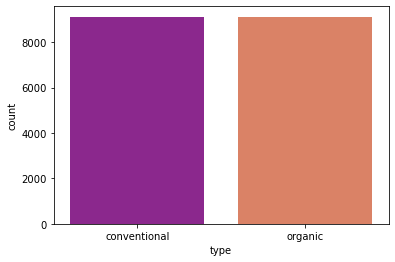

In [16]:
print(df1['type'].value_counts())
sns.countplot(x='type',data=df1,palette='plasma')

So from the above graph, the count of conventional and organic avacado is similar.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


<AxesSubplot:xlabel='year', ylabel='count'>

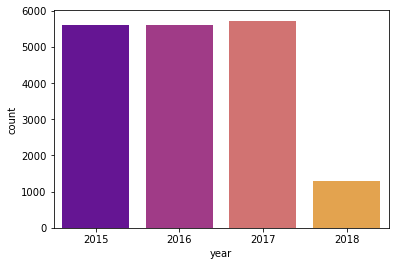

In [17]:
print(df1['year'].value_counts())
sns.countplot(x='year',data=df1,palette='plasma')

From the above year count, it is observed that count for the year 2018 is very low.

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

<AxesSubplot:xlabel='region', ylabel='count'>

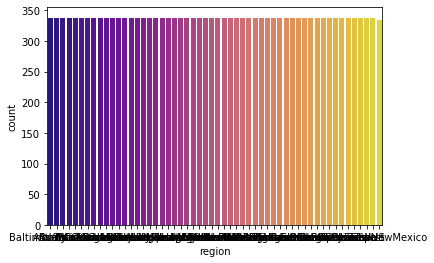

In [18]:
print(df1['region'].value_counts())
sns.countplot(x='region',data=df1,palette='plasma')

From the above grapn of region data, we can say that the value count for region is same.

0.00         15
990.00        5
300.00        5
550.00        4
266.67        4
             ..
90196.05      1
130858.02     1
510679.10     1
84522.00      1
12014.15      1
Name: Total Bags, Length: 18097, dtype: int64


<AxesSubplot:xlabel='Total Bags', ylabel='count'>

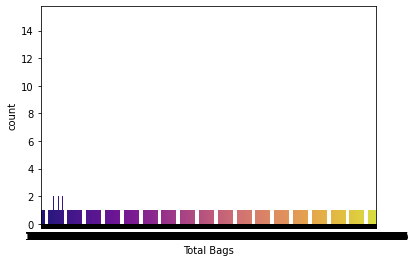

In [19]:
print(df1['Total Bags'].value_counts())
sns.countplot(x='Total Bags',data=df1,palette='plasma')

0.00        159
203.33       11
223.33       10
533.33       10
123.33        8
           ... 
14002.00      1
32441.00      1
29560.96      1
22077.20      1
11988.14      1
Name: Small Bags, Length: 17321, dtype: int64


<AxesSubplot:xlabel='Small Bags', ylabel='count'>

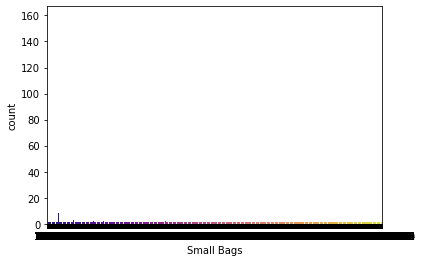

In [20]:
print(df1['Small Bags'].value_counts())
sns.countplot(x='Small Bags',data=df1,palette='plasma')

0.00          2370
3.33           187
6.67            78
10.00           47
4.44            38
              ... 
2528089.14       1
2287449.76       1
731388.25        1
673464.14        1
26.01            1
Name: Large Bags, Length: 15082, dtype: int64


<AxesSubplot:xlabel='Large Bags', ylabel='count'>

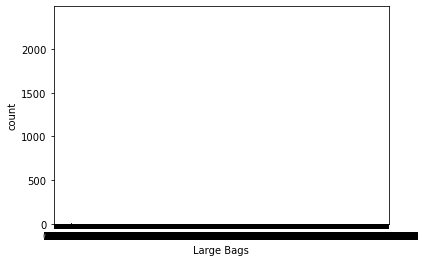

In [21]:
print(df1['Large Bags'].value_counts())
sns.countplot(x='Large Bags',data=df1,palette='plasma')

0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: XLarge Bags, Length: 5588, dtype: int64


<AxesSubplot:xlabel='XLarge Bags', ylabel='count'>

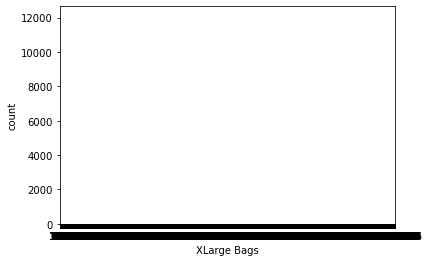

In [22]:
print(df1['XLarge Bags'].value_counts())
sns.countplot(x='XLarge Bags',data=df1,palette='plasma')

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64


<AxesSubplot:xlabel='Month', ylabel='count'>

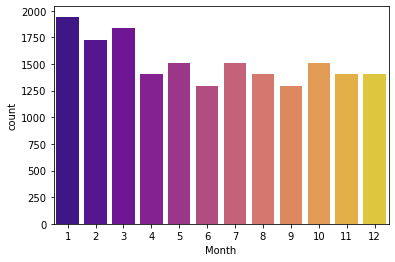

In [23]:
print(df1['Month'].value_counts())
sns.countplot(x='Month',data=df1,palette='plasma')

From the above graphs, 
The value count for the Total bags, and small bags is same and it is very low. 
The value count for the large bags and Xlarge bags is nearly zero.
The value count for the month and the day is vary

# Scatter Plot:

<AxesSubplot:xlabel='AveragePrice', ylabel='region'>

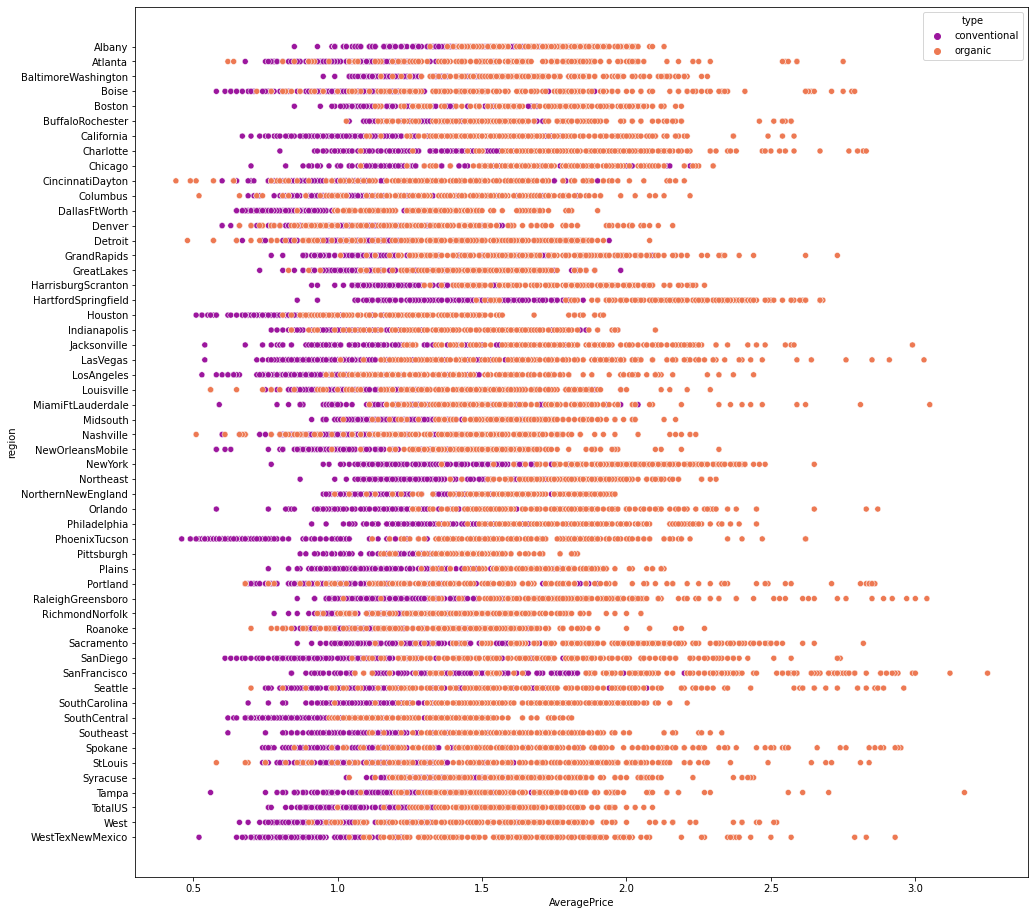

In [24]:
plt.figure(figsize=(16,16))
sns.scatterplot(x='AveragePrice', y='region', hue='type', data=df, palette="plasma")


<AxesSubplot:xlabel='AveragePrice', ylabel='Total Bags'>

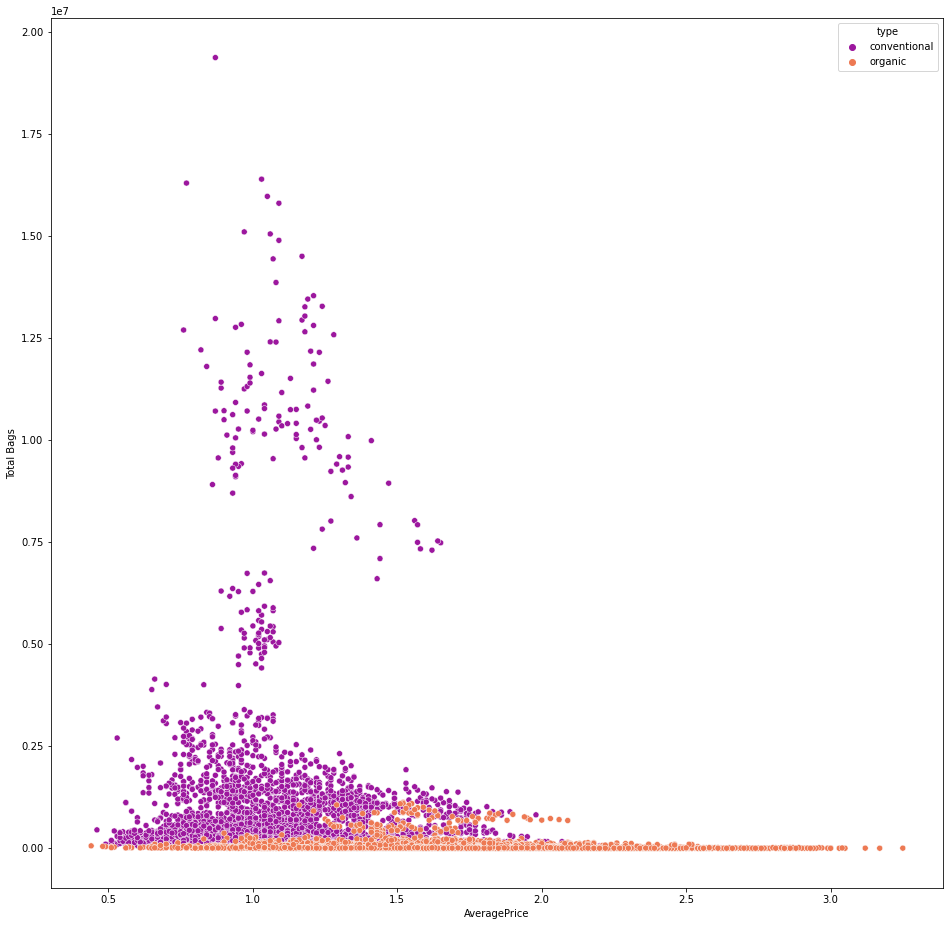

In [25]:
plt.figure(figsize=(16,16))
sns.scatterplot(x='AveragePrice', y='Total Bags', hue='type', data=df, palette="plasma")


<AxesSubplot:xlabel='AveragePrice', ylabel='year'>

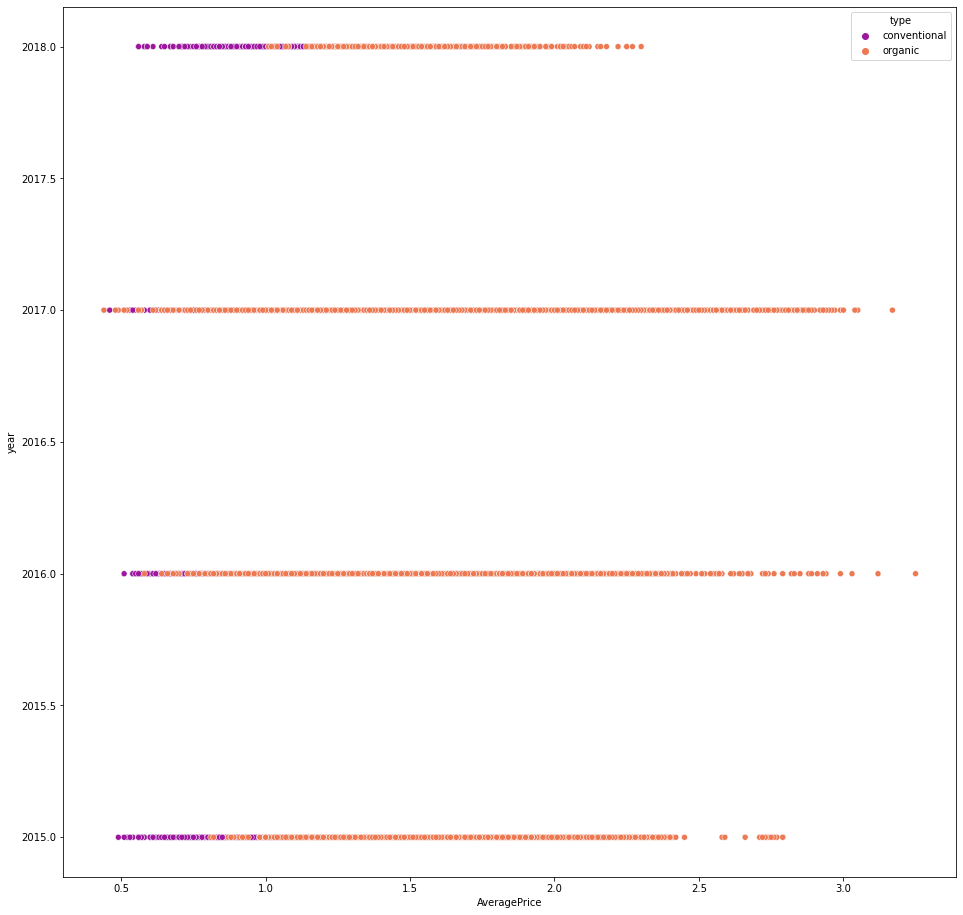

In [26]:
plt.figure(figsize=(16,16))
sns.scatterplot(x='AveragePrice', y='year', hue='type', data=df, palette="plasma")


From the above scatter plot, we can say that the Average price for the organic type is higher than the convetional type for the every region, in every year and average price for total bags of organic type is also higher than the conventional type. 

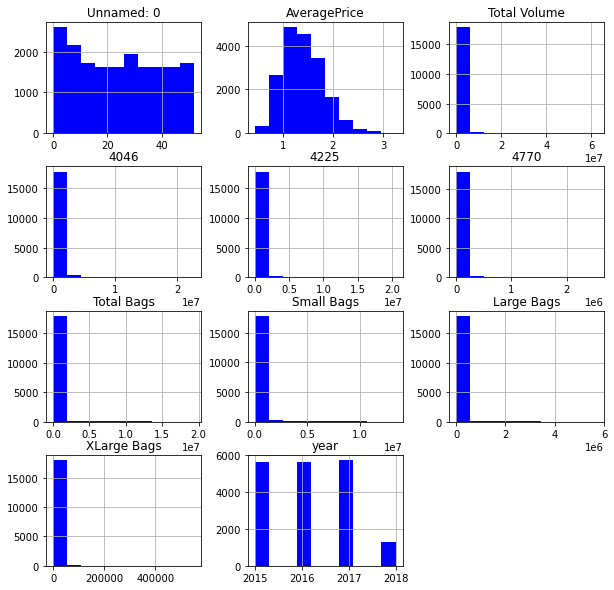

In [27]:
df.hist(figsize=(10,10),color='b')
plt.show()

# Checking the correlation:

In [28]:
df1.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Year
Date,1.000000,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475
AveragePrice,0.093197,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,0.017193,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,0.003353,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,-0.009559,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,-0.036531,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,0.071552,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,0.063915,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,0.087891,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,0.081033,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319


<AxesSubplot:>

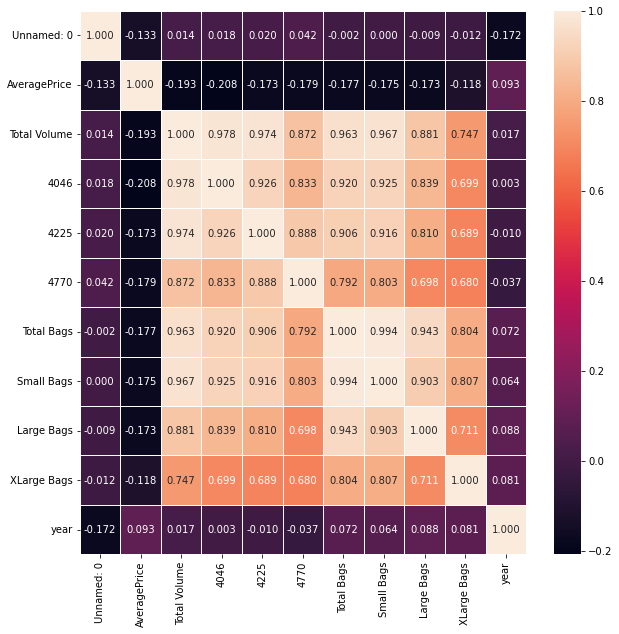

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor="white",fmt=".3f")

From the heat map, we can say that column 4046, 4225, 4770 &  column small bags, large bags, Xlarge bags are highly correlated with the total volume and total bags respectively. So we are going to drop these columns to secure from the multicolinearity problem.

In [30]:
df=df1.drop(['4046','4225','4770','Small Bags','Large Bags','XLarge Bags'],axis=1)

In [31]:
df

,Date,AveragePrice,Total Volume,Total Bags,type,year,region,Month,Year
0,2015,1.33,64236.62,8696.87,conventional,2015,Albany,12,27
1,2015,1.35,54876.98,9505.56,conventional,2015,Albany,12,20
2,2015,0.93,118220.22,8145.35,conventional,2015,Albany,12,13
3,2015,1.08,78992.15,5811.16,conventional,2015,Albany,12,6
4,2015,1.28,51039.60,6183.95,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...
18244,2018,1.63,17074.83,13498.67,organic,2018,WestTexNewMexico,2,4
18245,2018,1.71,13888.04,9264.84,organic,2018,WestTexNewMexico,1,28
18246,2018,1.87,13766.76,9394.11,organic,2018,WestTexNewMexico,1,21
18247,2018,1.93,16205.22,10969.54,organic,2018,WestTexNewMexico,1,14


We have dropped the columns, and now it is showing that 9 columns are present in the dataset.

In [32]:
type_rename = {'conventional' : 0,
              'organic' : 1
             }
df['type'] = df.type.map(type_rename)
df

,Date,AveragePrice,Total Volume,Total Bags,type,year,region,Month,Year
0,2015,1.33,64236.62,8696.87,0,2015,Albany,12,27
1,2015,1.35,54876.98,9505.56,0,2015,Albany,12,20
2,2015,0.93,118220.22,8145.35,0,2015,Albany,12,13
3,2015,1.08,78992.15,5811.16,0,2015,Albany,12,6
4,2015,1.28,51039.60,6183.95,0,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...
18244,2018,1.63,17074.83,13498.67,1,2018,WestTexNewMexico,2,4
18245,2018,1.71,13888.04,9264.84,1,2018,WestTexNewMexico,1,28
18246,2018,1.87,13766.76,9394.11,1,2018,WestTexNewMexico,1,21
18247,2018,1.93,16205.22,10969.54,1,2018,WestTexNewMexico,1,14


In [33]:
#It is not possible to assign the numbers to the every regions present in the column. so using the "OrdinalEncoder".
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df['region']=oe.fit_transform(df['region'].values.reshape(-1,1))

In [34]:
df

,Date,AveragePrice,Total Volume,Total Bags,type,year,region,Month,Year
0,2015,1.33,64236.62,8696.87,0,2015,0.0,12,27
1,2015,1.35,54876.98,9505.56,0,2015,0.0,12,20
2,2015,0.93,118220.22,8145.35,0,2015,0.0,12,13
3,2015,1.08,78992.15,5811.16,0,2015,0.0,12,6
4,2015,1.28,51039.60,6183.95,0,2015,0.0,11,29
...,...,...,...,...,...,...,...,...,...
18244,2018,1.63,17074.83,13498.67,1,2018,53.0,2,4
18245,2018,1.71,13888.04,9264.84,1,2018,53.0,1,28
18246,2018,1.87,13766.76,9394.11,1,2018,53.0,1,21
18247,2018,1.93,16205.22,10969.54,1,2018,53.0,1,14


Now we have changed the object data type in int and float type

In [35]:
df.dtypes

Date              int32
AveragePrice    float64
Total Volume    float64
Total Bags      float64
type              int64
year              int64
region          float64
Month             int32
Year              int32
dtype: object

Text(0.5, 1.0, 'correlation with target variable')

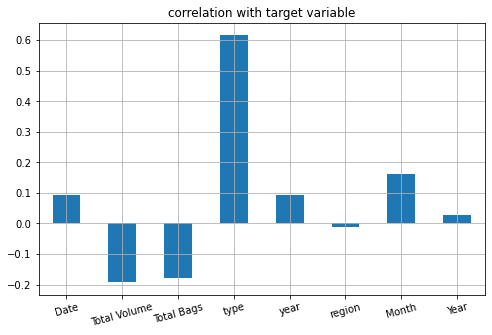

In [36]:
plt.figure(figsize=(8,5))
df.drop('AveragePrice',axis=1).corrwith(df['AveragePrice']).plot(kind='bar',grid=True)
plt.xticks(rotation=15)
plt.title('correlation with target variable')

Fron the above bar garph we can say that, the Total volume, Total bags and region are negatively correlated with the average price and date,type,year,month and day are positively correlated with the average price.

# Checking the skewness:

In [37]:
df.skew()

Date            0.215339
AveragePrice    0.580303
Total Volume    9.007687
Total Bags      9.756072
type            0.000329
year            0.215339
region          0.000030
Month           0.106617
Year            0.014310
dtype: float64

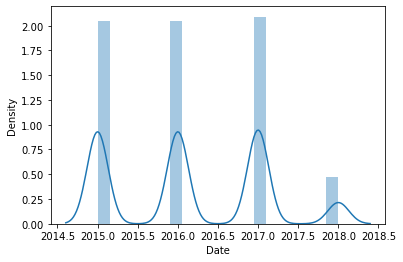

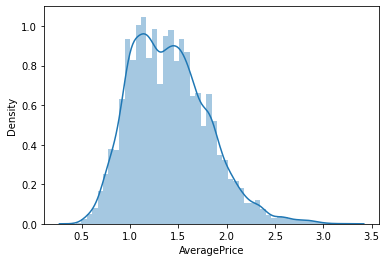

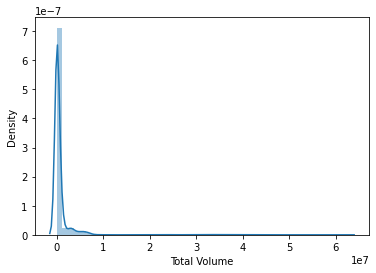

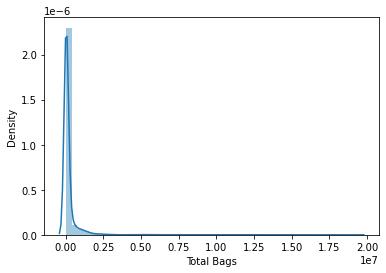

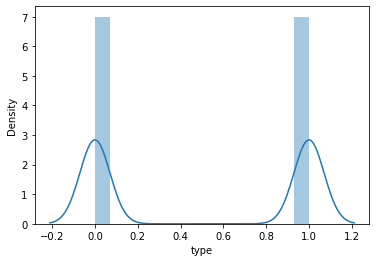

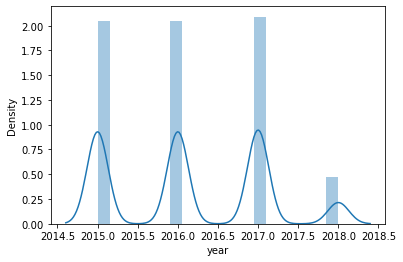

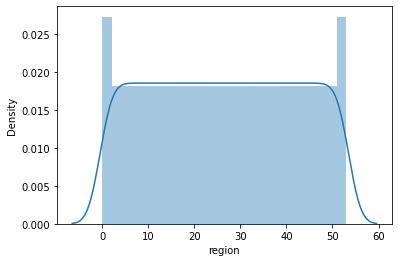

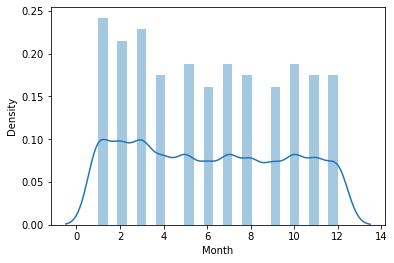

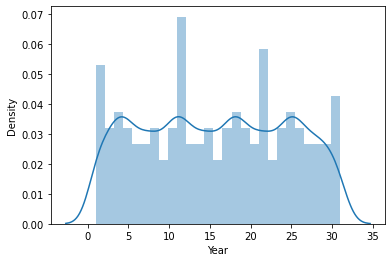

In [38]:
#KDE plot to check the distribution.
for i in df.columns:
    sns.distplot(df[i],kde=True)
    plt.show()

 There is no normal distribution in any of the columns.

<AxesSubplot:xlabel='AveragePrice'>

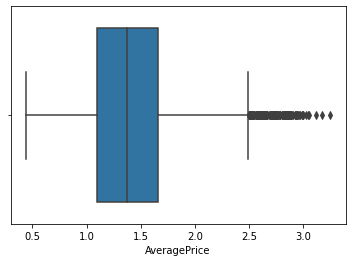

In [39]:
sns.boxplot(df['AveragePrice'])

<AxesSubplot:xlabel='Total Volume'>

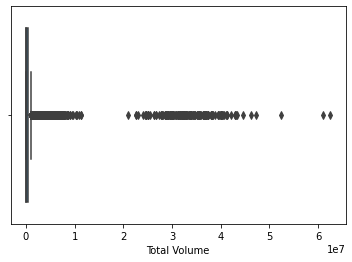

In [40]:
sns.boxplot(df['Total Volume'])

<AxesSubplot:xlabel='Total Bags'>

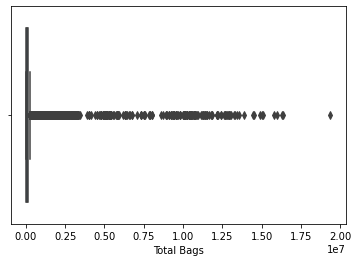

In [41]:
sns.boxplot(df['Total Bags'])

<AxesSubplot:xlabel='year'>

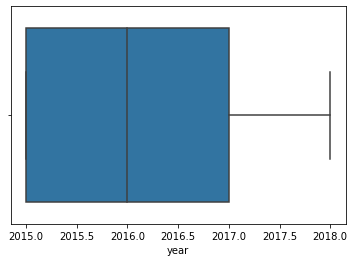

In [42]:
sns.boxplot(df['year'])

<AxesSubplot:xlabel='region'>

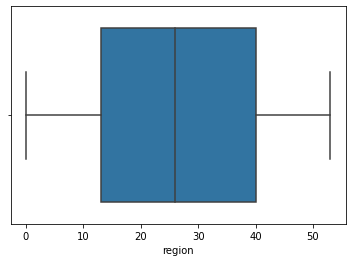

In [43]:
sns.boxplot(df['region'])

<AxesSubplot:xlabel='Month'>

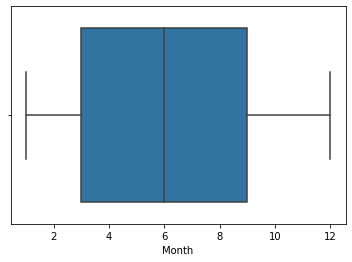

In [44]:
sns.boxplot(df['Month'])

From the above box plot we can say that there is a outliers in total volume and total bags columns, so removing the outliers.

# Z-score Method

In [45]:
from scipy.stats import zscore

z= np.abs(zscore(df))
print(np.where(z>3))



(array([ 2652,  2652,  2653,  2653,  2654,  2654,  2655,  2655,  2656,
        2656,  2657,  2657,  2658,  2658,  2659,  2659,  2660,  2660,
        2661,  2661,  2662,  2662,  2663,  2663,  2664,  2664,  2665,
        2665,  2666,  2666,  2667,  2667,  2668,  2668,  2669,  2669,
        2670,  2670,  2671,  2671,  2672,  2672,  2673,  2673,  2674,
        2674,  2675,  2675,  2676,  2676,  2677,  2677,  2678,  2678,
        2679,  2679,  2680,  2680,  2681,  2681,  2682,  2682,  2683,
        2683,  2684,  2684,  2685,  2685,  2686,  2686,  2687,  2687,
        2688,  2688,  2689,  2689,  2690,  2690,  2691,  2691,  2692,
        2692,  2693,  2693,  2694,  2694,  2695,  2695,  2696,  2696,
        2697,  2697,  2698,  2698,  2699,  2699,  2700,  2700,  2701,
        2701,  2702,  2702,  2703,  2703,  5460,  5460,  5461,  5461,
        5462,  5462,  5463,  5463,  5464,  5464,  5465,  5465,  5466,
        5466,  5467,  5467,  5468,  5468,  5469,  5469,  5470,  5470,
        5471,  5471

In [46]:
df_1 = df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (18249, 9)
After removing outliers:: (17931, 9)


318 rows are removed using z-score method, as there is no huge data loss so we can consider this method. 

# Splitting data into X and Y:

In [47]:
x = df_1.drop("AveragePrice", axis=1)
y = df_1["AveragePrice"]

In [48]:
x.shape

(17931, 8)

In [49]:
y.shape

(17931,)

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


# splitting into x_train and y_train:

In [51]:
lr=LinearRegression()
for i in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    lr_predict_train=lr.predict(x_train)
    lr_predict_test=lr.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{r2_score(y_train,lr_predict_train)}')
    print(f'At random state {i}, The test accuracy is :-{r2_score(y_test,lr_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :-0.43025569395355534
At random state 0, The test accuracy is :-0.42892288447147353


At random state 1, The training accuracy is :-0.4296233177793025
At random state 1, The test accuracy is :-0.4313304957944253


At random state 2, The training accuracy is :-0.42694896957102146
At random state 2, The test accuracy is :-0.44195136137310864


At random state 3, The training accuracy is :-0.43308511795606286
At random state 3, The test accuracy is :-0.41743979630400285


At random state 4, The training accuracy is :-0.432338008928149
At random state 4, The test accuracy is :-0.420463111542444


At random state 5, The training accuracy is :-0.42931548619933824
At random state 5, The test accuracy is :-0.4325227365588018


At random state 6, The training accuracy is :-0.42869096609602253
At random state 6, The test accuracy is :-0.4352212393499001


At random state 7, The training accuracy is :-0.4256404617835631
At random state 7, The test accur

At random state 45 is choosing as the random state.

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)

In [53]:
x_train.shape

(14344, 8)

In [54]:
y_train.shape

(14344,)

In [55]:
x_test.shape

(3587, 8)

In [56]:
y_test.shape

(3587,)

# Model building and Prediction:

# Linear Regression Model:

In [57]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
lr_predict=lr.predict(x_test)

0.43000855209755806


In [58]:
print('MSE:',mean_squared_error(lr_predict,y_test))
print('MAE:',mean_absolute_error(lr_predict,y_test))
print('r2_score:',r2_score(lr_predict,y_test))
print('RMSE:', np.sqrt(mean_squared_error(lr_predict,y_test)))

MSE: 0.08511411600276199
MAE: 0.22740799535703005
r2_score: -0.3115651768785075
RMSE: 0.2917432364301904


Text(0, 0.5, 'Predicted Y')

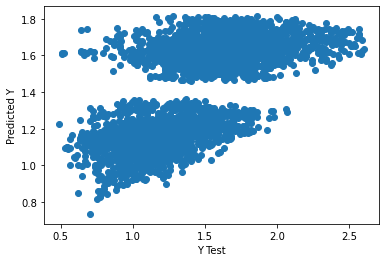

In [59]:
plt.scatter(x=y_test,y=lr_predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

From the RMSE value we can say that our model is good, but after plotting the y_test we can see that it is not a straight line so we are not sure about the model whether it is best model or not. So now trying the another model i.e. Decision Tree Regression.

# Decision Tree Regressor:

In [60]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_Predict=DTR.predict(x_test)

1.0


In [61]:
print('MSE:',mean_squared_error(DTR_Predict,y_test))
print('MAE:',mean_absolute_error(DTR_Predict,y_test))
print('r2_score:',r2_score(DTR_Predict,y_test))
print('RMSE:', np.sqrt(mean_squared_error(DTR_Predict,y_test)))

MSE: 0.03758441594647337
MAE: 0.12640367995539448
r2_score: 0.7463923504981574
RMSE: 0.19386700582222177


Text(0, 0.5, 'Predicted Y')

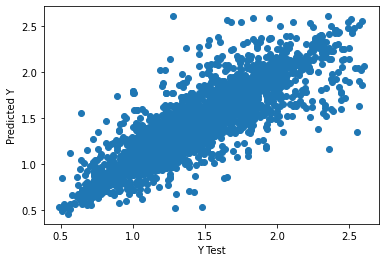

In [62]:
plt.scatter(x=y_test,y=DTR_Predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

From the RSME value (0.193), we can say that this model is good. 
And after plotting the y_test we got the staright line so we can say that this is the best model.

# Random Forest Regressor:

In [63]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
print(rdr.score(x_train,y_train))
rdr_Predict=rdr.predict(x_test)

0.9833205817589906


In [64]:
print('MSE:',mean_squared_error(rdr_Predict,y_test))
print('MAE:',mean_absolute_error(rdr_Predict,y_test))
print('r2_score:',r2_score(rdr_Predict,y_test))
print('RMSE:', np.sqrt(mean_squared_error(rdr_Predict,y_test)))

MSE: 0.01761658085865626
MAE: 0.09489461945915806
r2_score: 0.8544503461589636
RMSE: 0.13272746836527946


Text(0, 0.5, 'Predicted Y')

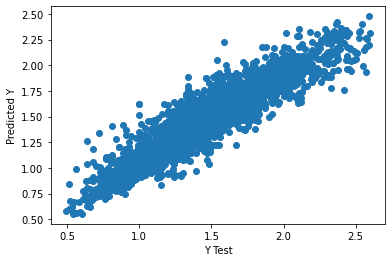

In [65]:
plt.scatter(x=y_test,y=rdr_Predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

From the RSME value(0.133), we can say that this model is good.
And after plotting the y_test we got the staright line so that we can this model is the best model.

# SVR:

In [66]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_Predict=svr.predict(x_test)

0.3619459608256048


In [67]:
print('MSE:',mean_squared_error(svr_Predict,y_test))
print('MAE:',mean_absolute_error(svr_Predict,y_test))
print('r2_score:',r2_score(svr_Predict,y_test))
print('RMSE:', np.sqrt(mean_squared_error(svr_Predict,y_test)))

MSE: 0.09425820051064812
MAE: 0.24052608829986646
r2_score: -0.6934553571329747
RMSE: 0.3070149841793526


Text(0, 0.5, 'Predicted Y')

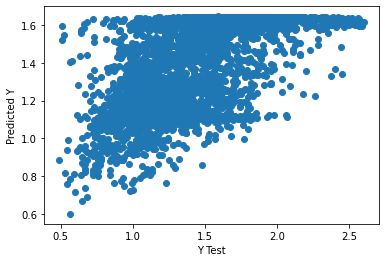

In [68]:
plt.scatter(x=y_test,y=svr_Predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

From RMSE value, the model is the good model as the value is lower, but the plot is not linear so this model is not the best model.

# Gradient Boosting Classifier:

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_Predict=GBR.predict(x_test)

0.7203363391203127


In [70]:
print('MSE:',mean_squared_error(GBR_Predict,y_test))
print('MAE:',mean_absolute_error(GBR_Predict,y_test))
print('r2_score:',r2_score(GBR_Predict,y_test))
print('RMSE:', np.sqrt(mean_squared_error(GBR_Predict,y_test)))

MSE: 0.04240093581734881
MAE: 0.15646220184706838
r2_score: 0.5256190196509728
RMSE: 0.20591487517260332


Text(0, 0.5, 'Predicted Y')

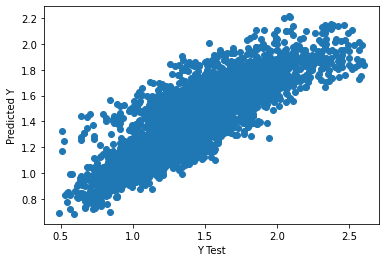

In [71]:
plt.scatter(x=y_test,y=GBR_Predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

From the above RMSE value and graph we can say that this is also the good model.

From the above model we can say that, the data is a continuous and regression model are the best fit model for the given continuous data.
So from the regression model, the Random Forest Regression model is the best fit as it is having the low RSME value and scatter plot is also in the linear form.

# Cross Validation:

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
rdr = RandomForestRegressor()

param ={
       'n_estimators':[100,200],
      'criterion':['mse','mae'],
     'min_samples_split':[2],
    'min_samples_leaf':[1],
}

In [75]:
rdr_grid=GridSearchCV(RandomForestRegressor(),param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [ ]:
rdr_grid.fit(x_train,y_train)
rdr_grid_PRED=rdr_grid.best_estimator_.predict(x_test)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


In [90]:
rdr_grid.best_params_

{'criterion': 'mse',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [92]:
print('MSE:',mean_squared_error(rdr_grid_PRED,y_test))
print('MAE:',mean_absolute_error(rdr_grid_PRED,y_test))
print('r2_score:',r2_score(rdr_grid_PRED,y_test))

MSE: 0.017933938341232226
MAE: 0.09568962921661556
r2_score: 0.8512726922323649


In [96]:
RF = RandomForestRegressor()

param ={
       'n_estimators':[100],
      'criterion':['mse'],
     'min_samples_split':[2],
    'min_samples_leaf':[1],
}

In [97]:
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [98]:
RF_grid.fit(x_train,y_train)
RF_grid_PRED=RF_grid.best_estimator_.predict(x_test)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


In [99]:
print('MSE:',mean_squared_error(RF_grid_PRED,y_test))
print('MAE:',mean_absolute_error(RF_grid_PRED,y_test))
print('r2_score:',r2_score(RF_grid_PRED,y_test))

MSE: 0.017668631212712574
MAE: 0.09509919152495122
r2_score: 0.8539991353383092


In [100]:
RF_grid_PRED

array([0.7821, 1.3247, 0.9754, ..., 1.637 , 1.6471, 1.0618])

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

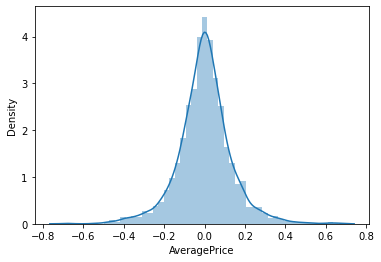

In [101]:
sns.distplot(RF_grid_PRED-y_test)

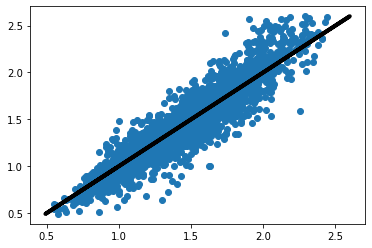

In [102]:
plt.scatter(RF_grid_PRED,y_test)
plt.plot(y_test,y_test,linewidth=4,color='black')

In [103]:
import joblib

In [104]:
joblib.dump(RF_grid.best_estimator_,'Avocado_Prediction_Project.obj')

['Avocado_Prediction_Project.obj']

# END